In [1]:
# Importing the data
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("C:\\Users\\PC-LENOVO\\Desktop\\ExcelR Assginments\\Logistic Regression\\bank-full.xlsx")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# EDA----->EXPLORATORY DATA ANALYSIS
# Box plot
import seaborn as sns
import matplotlib.pyplot as plt
data = ['age','balance','day','duration','campaign','pdays','previous']

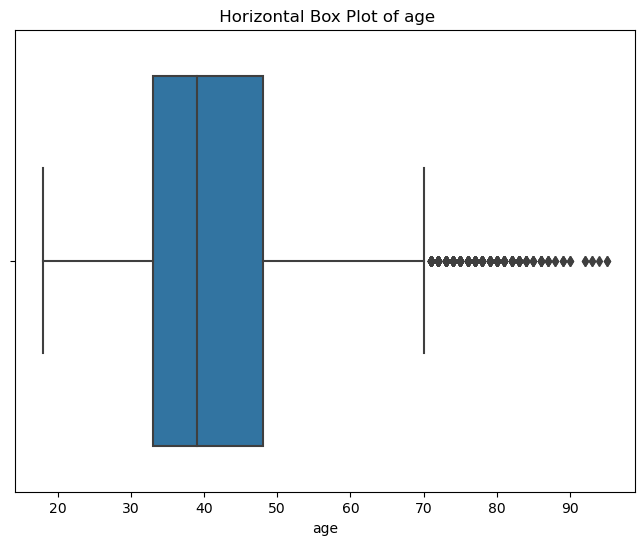

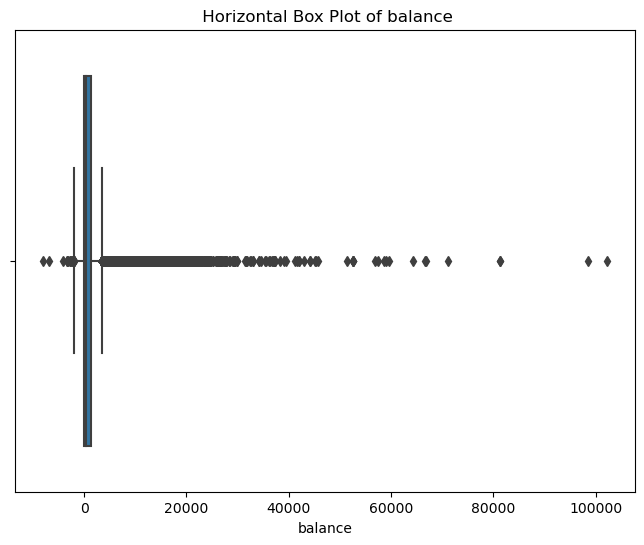

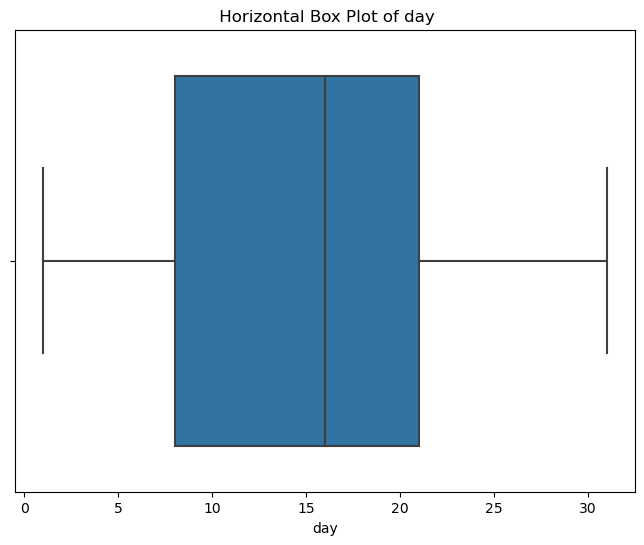

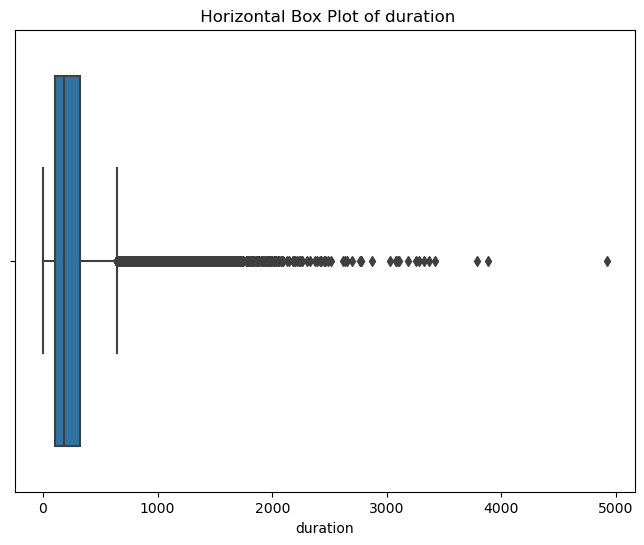

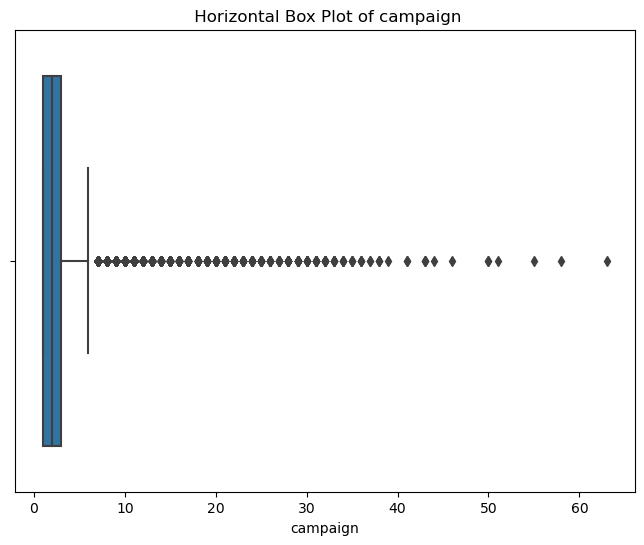

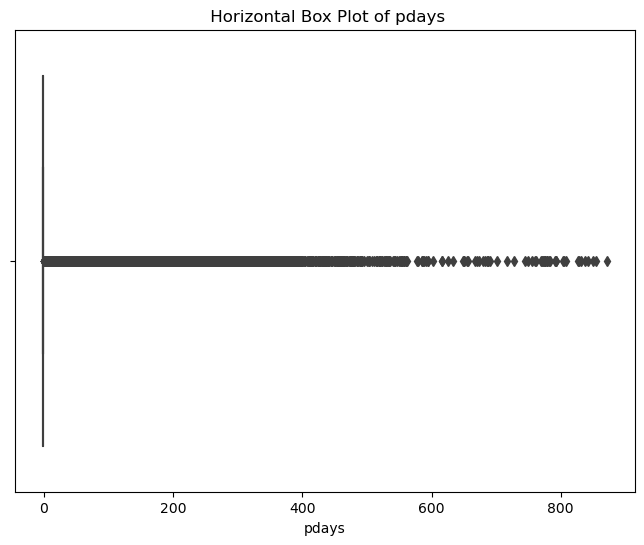

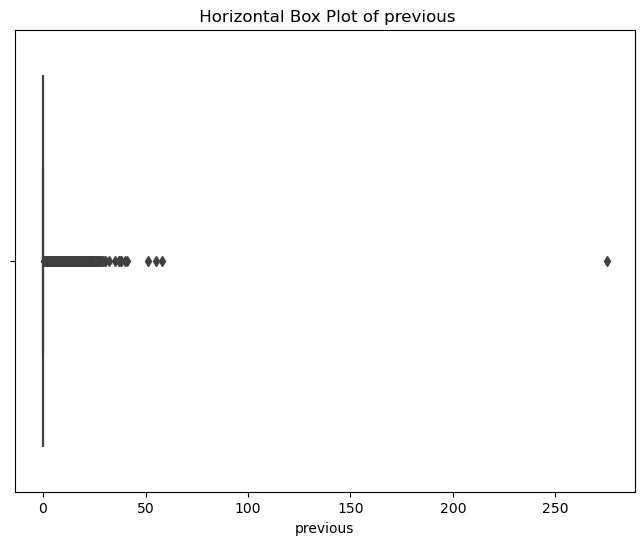

In [9]:
for column in data:
    plt.figure(figsize=(8, 6))  # we can Adjust the figure size as needed
    sns.boxplot(x=df[column])
    plt.title(f" Horizontal Box Plot of {column}")
    plt.show()

    
#from the above plotting we can see there are outliers present  
#Now , we will remove the outliers

In [10]:
"""Removing the outliers"""
# List of column names with continuous variables
continuous_columns = ["age", "balance","duration","campaign","pdays","previous" ] 

In [11]:
# Creating a new DataFrame without outliers for each continuous column
data_without_outliers = df.copy()

In [12]:
for df.cloumns in continuous_columns:
    Q1 = data_without_outliers[column].quantile(0.25)
    Q3 = data_without_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_without_outliers = data_without_outliers[(data_without_outliers[column] >= lower_bound) & (data_without_outliers[column]<= upper_bound)]

In [13]:
# Printing the cleaned data without outliers
print(data_without_outliers)  # [36954 rows x 17 columns]
df = data_without_outliers
print(df) 
#Now we will perform the transformations on the data containing no outliers

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45203   23       student    single   tertiary      no      113      no   no   
45205   25    technician    single  secondary      no      505      no  yes   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pd

In [14]:
# Data Transformation
#Standardisation for the continuous Variables
df_cont = df.iloc[:,[0,5,9,11,12,13,14]]
df_cont

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45203,23,113,17,266,1,-1,0
45205,25,505,17,386,2,-1,0
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0


In [15]:
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36954 entries, 0 to 45209
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       36954 non-null  int64
 1   balance   36954 non-null  int64
 2   day       36954 non-null  int64
 3   duration  36954 non-null  int64
 4   campaign  36954 non-null  int64
 5   pdays     36954 non-null  int64
 6   previous  36954 non-null  int64
dtypes: int64(7)
memory usage: 2.3 MB


In [16]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [17]:
X1 = SS.fit_transform(df_cont)
X1= pd.DataFrame(X1)

In [18]:
X1.columns=list(df_cont)
X1

,age,balance,day,duration,campaign,pdays,previous
0,1.636380,0.271165,-1.331204,0.012484,-0.577903,0.0,0.0
1,0.294108,-0.424340,-1.331204,-0.406959,-0.577903,0.0,0.0
2,-0.760534,-0.433223,-1.331204,-0.692942,-0.577903,0.0,0.0
3,0.581738,0.061592,-1.331204,-0.631933,-0.577903,0.0,0.0
4,-0.760534,-0.433552,-1.331204,-0.227742,-0.577903,0.0,0.0
...,...,...,...,...,...,...,...
36949,-1.719300,-0.396704,0.102070,0.031549,-0.577903,0.0,0.0
36950,-1.527547,-0.267736,0.102070,0.489123,-0.277218,0.0,0.0
36951,0.965244,-0.162456,0.102070,2.742673,0.023466,0.0,0.0
36952,2.882776,0.134959,0.102070,0.756041,-0.277218,0.0,0.0


In [19]:
df_cat = df.iloc[:,[1,2,3,4,6,7,8,10,15]]
df_cat

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45203,student,single,tertiary,no,no,no,cellular,nov,unknown
45205,technician,single,secondary,no,no,yes,cellular,nov,unknown
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown


In [20]:
#Label Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [21]:
for i in range(0,9):
    df_cat.iloc[:,i] = LE.fit_transform(df_cat.iloc[:,i])

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_18588\592157930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.iloc[:,i] = LE.fit_transform(df_cat.iloc[:,i])
C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_18588\592157930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.iloc[:,i] = LE.fit_transform(df_cat.iloc[:,i])
C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_18588\592157930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [22]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,4,1,2,0,1,0,2,8,0
1,9,2,1,0,1,0,2,8,0
2,2,1,1,0,1,1,2,8,0
3,1,1,3,0,1,0,2,8,0
4,11,2,3,0,0,0,2,8,0


In [23]:
# Defining input features (X) and target variable (y)
X = pd.concat([df_cont,df_cat],axis = 1)
X

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,113,17,266,1,-1,0,8,2,2,0,0,0,0,9,0
45205,25,505,17,386,2,-1,0,9,2,1,0,0,1,0,9,0
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,0
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,0


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36954 entries, 0 to 45209
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        36954 non-null  int64
 1   balance    36954 non-null  int64
 2   day        36954 non-null  int64
 3   duration   36954 non-null  int64
 4   campaign   36954 non-null  int64
 5   pdays      36954 non-null  int64
 6   previous   36954 non-null  int64
 7   job        36954 non-null  int32
 8   marital    36954 non-null  int32
 9   education  36954 non-null  int32
 10  default    36954 non-null  int32
 11  housing    36954 non-null  int32
 12  loan       36954 non-null  int32
 13  contact    36954 non-null  int32
 14  month      36954 non-null  int32
 15  poutcome   36954 non-null  int32
dtypes: int32(9), int64(7)
memory usage: 3.5 MB


In [25]:
Y = df.iloc[:,16:17]
Y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45203,yes
45205,yes
45206,yes
45207,yes


In [26]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [27]:
Y.iloc[:,0] = LE.fit_transform(Y.iloc[:,0])
Y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45203,1
45205,1
45206,1
45207,1


In [28]:
#Data Partition ,Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
#By default it will take 75% of data as training data if we donot mention in the code#

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.75,random_state = 15)

In [30]:
X_train.shape

(27715, 16)

In [31]:
X_test.shape

(9239, 16)

In [32]:
#Fitting the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [33]:
logreg.fit(X,Y)

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
Y_pred =logreg.predict(X)

In [35]:
logreg.predict_proba(X)[:,1]
df["Y_probabilities"] = logreg.predict_proba(X)[:,1]

In [36]:
#Function to change the cut off
def f1(X):
    if X<0.4:
        return 0
    elif X>=0.4:
        return 1

In [37]:
df["Y_prob"] = df["Y_probabilities"].apply(f1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Y_probabilities,Y_prob
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.034237,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.020078,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.032412,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.027499,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.033001,0


In [38]:
#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [39]:
cm = confusion_matrix(Y,Y_pred)
cm  

array([[33137,   433],
       [ 2768,   616]], dtype=int64)

In [41]:
ac1 = accuracy_score(Y,Y_pred)
print("Training Accuracy Score:",ac1)   # Training Accuracy Score: 0.9133787952589706
ac2 = accuracy_score(Y,Y_pred)
print("Test Accuracy Score:",ac2)       # Test Accuracy Score: 0.9133787952589706

Training Accuracy Score: 0.9133787952589706
Test Accuracy Score: 0.9133787952589706


In [42]:
#Validation set approach
training_accuracy = []
test_accuracy = []

In [43]:
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,random_state=i)
    logreg.fit(X_train,Y_train)
    Y_pred_train =logreg.predict(X_train)
    Y_pred_test =logreg.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

In [44]:
print("Average Training accuracy ",np.mean(training_accuracy).round(3))   # Average Training accuracy  0.913
print("Average Test accuracy ",np.mean(test_accuracy).round(3))           # Average Test accuracy  0.913

Average Training accuracy  0.913
Average Test accuracy  0.913


In [45]:
#Metrices
from sklearn.metrics import recall_score,precision_score,f1_score
print("Sensitivity score:",recall_score(Y,Y_pred).round(3))       # Sensitivity score: 0.182
print("Precision score:",precision_score(Y,Y_pred).round(3))      # Precision score: 0.587
print("F1 score:",f1_score(Y,Y_pred).round(3))                    # F1 score: 0.278

Sensitivity score: 0.182
Precision score: 0.587
F1 score: 0.278


In [46]:
TN =cm[0,0]
FP =cm[1,0]

In [47]:
TNR = TN/(TN+FP)

In [49]:
print("Specificity:",TNR.round(3))       #Specificity: 0.923

Specificity: 0.923


In [50]:
#K-fold 
from sklearn.model_selection import KFold
kf = KFold(n_splits=5) 

In [51]:
for train_index,test_index in kf.split(range(11,143)):
    print(train_index)
    print(test_index)

[ 27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131]
[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 4

In [52]:
training_accuracy = []
test_accuracy = []

In [53]:
for train_index,test_index in kf.split(X):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    Y_train,Y_test= Y.iloc[train_index],Y.iloc[test_index]
    logreg = LogisticRegression()
    logreg.fit(X_train,Y_train)
    Y_pred_train =logreg.predict(X_train)
    Y_pred_test =logreg.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test)) 

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

In [54]:
print("K-Fold Training accuracy ",np.mean(training_accuracy).round(3))     # K-Fold Training accuracy  0.914
print("K-Fold Test accuracy ",np.mean(test_accuracy).round(3))             # K-Fold Test accuracy  0.912

K-Fold Training accuracy  0.914
K-Fold Test accuracy  0.912


In [55]:
# ROC Curve plotting and finding AUC value
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,dummy = roc_curve(Y,df["Y_probabilities"])

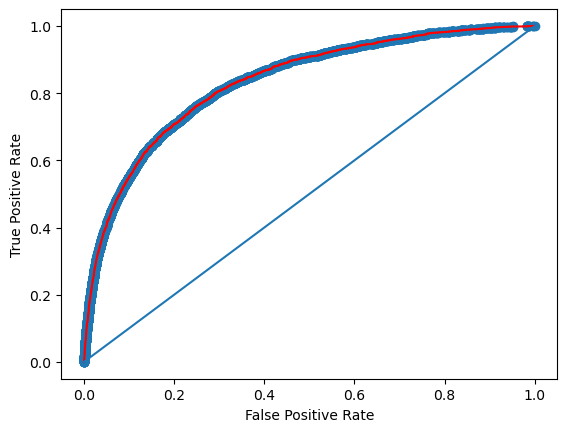

In [56]:
import matplotlib.pyplot as plt
plt.scatter(x=fpr,y=tpr)
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [57]:
auc = roc_auc_score(Y,df["Y_probabilities"])
print("Area under curve:",(auc*100).round(3)) # Area under curve: 83.295 ,83% it is good model

Area under curve: 83.295


In [58]:
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

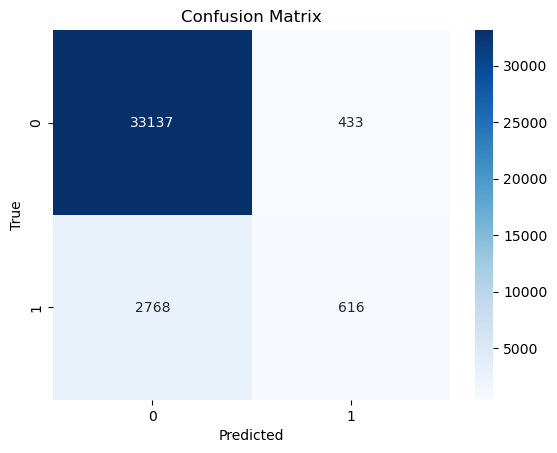

In [59]:
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# The model has low sensitivity (recall) of 0.192, indicating that it has a relatively high rate of false negatives
# model shows moderate precision with a score of 0.584
#  F1 score, which balances precision and recall, is 0.289, indicating that the model's overall performance is relatively modest
# the high specificity (specificity: 0.924) indicates that the model has a low rate of false positives, meaning it is effective at correctly identifying clients who will not subscribe to the term deposit
# AUC (Area Under the Curve) of 84.186 indicates that the model's ability to discriminate between positive and negative cases is relatively good